# Week 7 handin

## 07 Assignment
#### Exercise1:

    1. Create a python class car_basen_dK:
    2. Use selenium to set the search criteria “leasing” to false
    3. Use selenium to search for; “Bentley”
    4. Use BeautifulSoup to find all the prices, kilometres driven and the link reference href
    5. Calculate which car is the cheapest pr. kilometre driven
        a. Remember that some of the prices are listed as; “Ring”
        b. Handle that…
    7. Test the class from the .py file in CLI
    8. Make the class dynamic

#### Exercise2:

    1. In your notebook import the python class car_basen_dK:
    2. Search for the Bentley car
    3. Sort the cars in ascending order
    4. Use regex to extract the car model from the link reference
    5. Plot the prices on the Y axis, and the car name on the x axis in a bar chart
    6. Demonstrate the function calculating the cheapest car pr. kilometre driven

## 02 Status
    I completed all the steps of the exercises.

## 03 Solutions

In [1]:
# In your notebook import the python class car_basen_dK:
import sys
sys.path.append("my_modules")
from bil_selenium import car_basen_dK
dont_print = sys.path.pop()

In [2]:
# Search for the Bentley car
try:
    sw = car_basen_dK()
    selenium_bentley_search = sw.no_leasing_search("Bentley")
finally:
    sw.quitSelenium()

Setting up...
Launching browser...
Redirecting url to: https://www.bilbasen.dk/
Cookie popup handled...
Redirected url to: https://www.bilbasen.dk/brugt/bil?IncludeEngrosCVR=true&amp;PriceFrom=0&amp;includeLeasing=false&amp;free=Bentley
- Quitting selenium


In [3]:
# Sort the cars in ascending order
try:
    sw = car_basen_dK()
    bentley_cars = sw.get_all_cars_info(selenium_bentley_search)
    for car in bentley_cars:
        if car.price == "Ring":
            car.price = 0
        else: 
            car.price = int(car.price)
    sorted_bentley_cars = sorted(bentley_cars, key=lambda x: x.price)
    for car in sorted_bentley_cars:
        print(car)
finally:
    sw.quitSelenium()

Setting up...
Launching browser...
Redirecting url to: https://www.bilbasen.dk/
Fetching page content...
Content sample: 
Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/continental-supersports/60-convertible-aut-2d/4854656&#39;, &#39;1399800&#39; kr, &#39;82000&#39; km)

Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/continental-gt/60-w12-aut-2d/4864853&#39;, 0 kr, &#39;18000&#39; km)

Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/continental-gt/60-w12-convertible-speed-aut-2d/4848963&#39;, 0 kr, &#39;100000&#39; km)

Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/sport-special/425-recreation-2d/4338255&#39;, 0 kr, &#39;95000&#39; km)

Car(&#39;https://www.bilbasen.dk/brugt/bil/mini/clubman-cooper-s/16-5d/4858775&#39;, 128000 kr, &#39;135000&#39; km)

Car(&#39;https://www.bilbasen.dk/brugt/bil/land-rover/range-rover/30-d-vogue-aut-5d/4852364&#39;, 179900 kr, &#39;258000&#39; km)

Car(&#39;https://www.bilbasen.dk/brugt/bil/mini/cooper-s/16-175-3d/4608028&#39;, 197000 kr

In [4]:
# Use regex to extract the car model from the link reference
import re
regex = re.compile(r'(/bil).([\w\-\.]+).([\w\-\.]+).([\w\-\.]+)')
sorted_car_names = []
for car in sorted_bentley_cars:
    print(car)
    tmp = regex.findall(car.url)
    print("Model name:", tmp[0][2])
    sorted_car_names.append(tmp[0][2])


Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/continental-gt/60-w12-aut-2d/4864853&#39;, 0 kr, &#39;18000&#39; km)
Model name: continental-gt

Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/continental-gt/60-w12-convertible-speed-aut-2d/4848963&#39;, 0 kr, &#39;100000&#39; km)
Model name: continental-gt

Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/sport-special/425-recreation-2d/4338255&#39;, 0 kr, &#39;95000&#39; km)
Model name: sport-special

Car(&#39;https://www.bilbasen.dk/brugt/bil/mini/clubman-cooper-s/16-5d/4858775&#39;, 128000 kr, &#39;135000&#39; km)
Model name: clubman-cooper-s

Car(&#39;https://www.bilbasen.dk/brugt/bil/land-rover/range-rover/30-d-vogue-aut-5d/4852364&#39;, 179900 kr, &#39;258000&#39; km)
Model name: range-rover

Car(&#39;https://www.bilbasen.dk/brugt/bil/mini/cooper-s/16-175-3d/4608028&#39;, 197000 kr, &#39;52000&#39; km)
Model name: cooper-s

Car(&#39;https://www.bilbasen.dk/brugt/bil/bentley/continental-flying-spur/60-aut-4d/3433219&#39;,

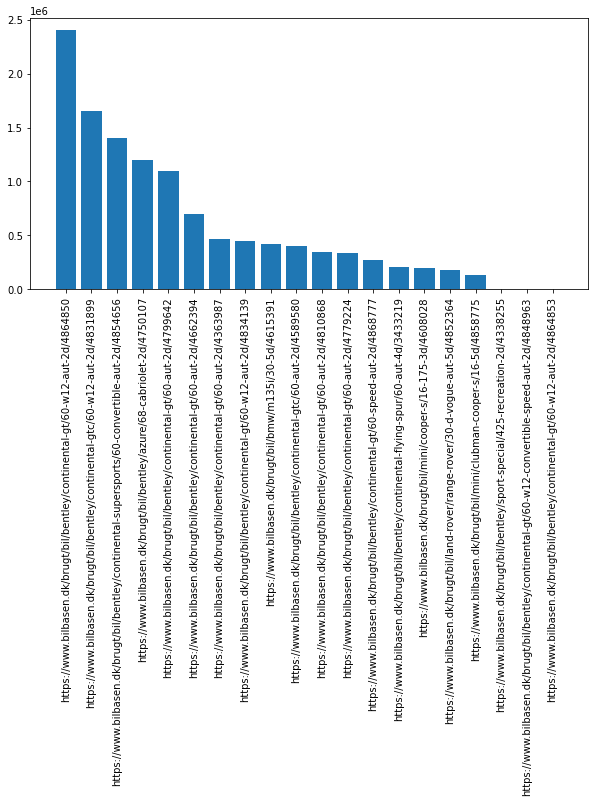

In [5]:
# Plot the prices on the Y axis, and the car name on the x axis in a bar chart
import matplotlib.pyplot as plt
import numpy as np

reversed_SCN = reversed(sorted_car_names)
reversed_SBC = reversed(sorted_bentley_cars)

car_prices = []
car_names = []
for car in reversed(sorted_bentley_cars):
    car_prices.append(car.price)
    car_names.append(car.url)

fig, ax = plt.subplots(figsize =(10, 5)) 
ax.bar(car_names, car_prices)
plt.xticks(rotation=90)
  
plt.show() 

In [6]:
# Demonstrate the function calculating the cheapest car pr. kilometre driven
print(car.cheapest_pr_km(bentley_cars))


Car(&#39;https://www.bilbasen.dk/brugt/bil/land-rover/range-rover/30-d-vogue-aut-5d/4852364&#39;, 179900 kr, &#39;258000&#39; km)
